# Bloco 3 - Aprendizado não-supervisionado

## Dados

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Código para ler o arquivo em xls e retorná-lo em dataframe
dfbr = pd.read_excel("dados brasileirao.xlsx") 

# Nesta linha, foram retiradas todas as colunas que possuiam dados relativos à estáticas após o começo do jogo. Os Dados após o jogo começar não nos ajudam a prever os nossos resultados, pois são muito específicos de cada jogo. Então vamos analisar o principal: número de gols
dfbr = dfbr.drop(["escanteios_man", "escanteios_vis", "publico_max", "faltas_man", "faltas_vis", "chutes_bola_parada_man", "chutes_bola_parada_vis", "defesas_man", "defesas_vis", "impedimentos_man", "impedimentos_vis", "chutes_man", "chutes_vis", "chutes_fora_man", "chutes_fora_vis", "gols_1_tempo_man", "gols_1_tempo_vis"], axis=1)

# Nesta linha, foram tiradas todas as linhas que possuiam dados faltantes, visto que os anos iniciais não tinham todos os dados da tabela preenchidos.
dfbr = dfbr.dropna(axis = 0)

# Nesta linha, são redefinidos os índices para facilitar o trabalho com os dados e foi feito após retirar os dados que não íamos precisar.
dfbr = dfbr.reset_index()

# Nesta parte, foram retiradas as colunas "index" e "Unnamed: 0" para facilitar o trabalho com os dados (Eram colunas com repetição de índices antigos)
dfbr = dfbr.drop(columns=["index", "Unnamed: 0"])

c:\venv\ilumpy\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [61]:
# Cria uma lista de condições
Condições = [
    (dfbr['gols_man'] > dfbr['gols_vis']),
    (dfbr['gols_man'] == dfbr['gols_vis']),
    (dfbr['gols_man'] < dfbr['gols_vis'])
    ]

# Cria uma lista com os possíveis resultados
Valores = ['Vitória', 'Empate', 'Derrota']

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

dfbr.head()

,ano_campeonato,data,horario,rodada,estadio,arbitro,publico,time_man,time_vis,tecnico_man,tecnico_vis,colocacao_man,colocacao_vis,valor_equipe_titular_man,valor_equipe_titular_vis,idade_media_titular_man,idade_media_titular_vis,gols_man,gols_vis,resultado_man
0,2007,2007-05-03,12:00,1,Estádio Governador Magalhães Pinto,Elmo Alves Resende Cunha,5116.0,Atlético-MG,Náutico,Tico dos Santos,Paulo César Gusmão,7.0,13.0,1650000.0,500000.0,24.6,26.4,2.0,1.0,Vitória
1,2007,2007-05-03,12:00,1,Estádio Jornalista Mário Filho,Leonardo Gaciba da Silva,7801.0,Flamengo,Palmeiras,Ney Franco,Caio Júnior,16.0,4.0,550000.0,3750000.0,26.2,26.7,2.0,4.0,Derrota
2,2007,2007-05-03,12:00,1,Estádio Jornalista Mário Filho,Wallace Nascimento Valente,12132.0,Fluminense,Cruzeiro,Renato Gaúcho,Dorival Júnior,11.0,10.0,7200000.0,5750000.0,24.4,24.1,2.0,2.0,Empate
3,2007,2007-05-03,12:00,1,Estádio Durival Britto e Silva,Elvecio Zequetto,3568.0,Paraná,Grêmio,Zetti,Mano Menezes,3.0,20.0,1000000.0,1500000.0,26.5,24.0,3.0,0.0,Vitória
4,2007,2007-05-03,12:00,1,Estádio Adelmar da Costa Carvalho,Antonio Hora Filho,23273.0,Sport Recife,Santos FC,Giba,Vanderlei Luxemburgo,2.0,19.0,2750000.0,5350000.0,26.2,24.4,4.0,1.0,Vitória


## ML Não Supervionado e PCA

### Reorganinzando os Dados

In [62]:
# Cria uma lista de condições
Condições = [
    (dfbr['resultado_man'] == 'Vitória'),
    (dfbr['resultado_man'] == 'Empate'),
    (dfbr['resultado_man'] == 'Derrota')
    ]

# Cria uma lista com os possíveis resultados
Valores = [1, 0.5, 0]

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

# Normalização dos dados

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man","colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis","colocacao_vis"]#,"gols_man","gols_vis"]
TARGET = ["resultado_man"]

from sklearn.preprocessing import StandardScaler

X = dfbr.reindex(FEATURES, axis=1)
Y = dfbr["resultado_man"]

sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)
#print(X_norm)

In [63]:
# Apicando a PCA nos dados

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)
#print(X_pca)

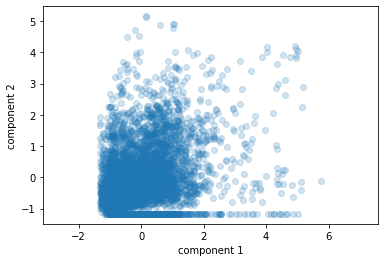

In [64]:
#X_new = pca.inverse_transform(X_pca)
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.2)
#plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.1)
#plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

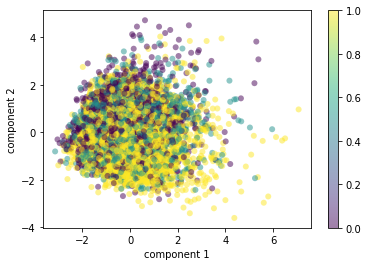

In [65]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=Y)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

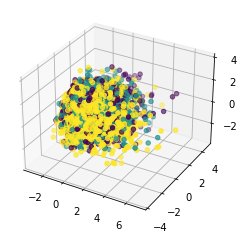

In [66]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=Y)

In [67]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
#loadings

array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

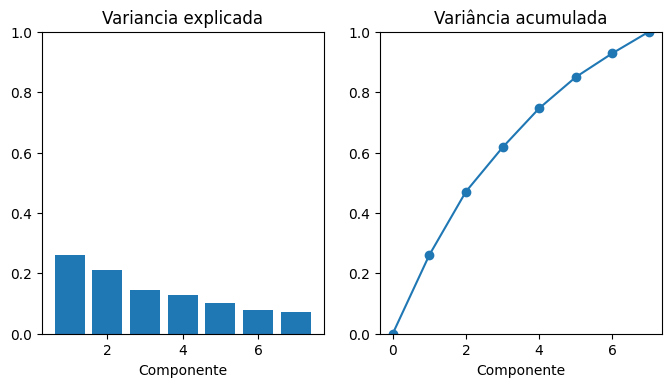

In [68]:
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)


Começamos por reorganizar os dados e fizemos o PCA com algumas das features usadas anteriormente, dados esses que estavam normalizados. Após isso plotamos alguns gráficos para visualizar os dados normalizados e algumas componentes do PCA, e por meio desses graficos as componentes do PCA foram capazes de mostrar relativamente o resultado, mas não foram capazes de criar divisão clara. Por fim a variância explicada mostra que todas as componemtes tem certa relevância e a acumulada mostra que as 4 primeiras já seriam o suficiente para determinar cerca de 80% dos resultados.

### Refazendo Classificação por Floresta Aleatória

In [69]:
Condições = [
    (dfbr['gols_man'] > dfbr['gols_vis']),
    (dfbr['gols_man'] == dfbr['gols_vis']),
    (dfbr['gols_man'] < dfbr['gols_vis'])
    ]

# Cria uma lista com os possíveis resultados
Valores = ['Vitória', 'Empate', 'Derrota']

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

#dfbr.head()

In [70]:
# Nova divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.3 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()
X_pca_treino = X_pca.loc[indices_treino].sort_index()
X_pca_teste = X_pca.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ['PC1','PC2','PC3','PC4','PC5']
TARGET = ["resultado_man"]

# Divide os dados para se adequarem aos modelos

X_treino = X_pca_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values
X_teste = X_pca_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values

In [71]:
# Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier

# cria o modelo
modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino.ravel())

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print(previsao[1])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Vitória
Accuracy: 0.47935003385240355


In [72]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(previsao, return_counts=True)
Matriz_Resultados_Previstos_FA = np.column_stack((resultados_mandante, quantidade)) 
Matriz_Resultados_Previstos_FA

array([['Derrota', 206],
       ['Empate', 214],
       ['Vitória', 1057]], dtype=object)

In [73]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_FA = confusion_matrix(y_teste, previsao)
Matriz_Confusao_FA

array([[ 73,  53, 193],
       [ 43,  67, 296],
       [ 90,  94, 568]], dtype=int64)

In [74]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
classification_report(y_teste, previsao)

'              precision    recall  f1-score   support\n\n     Derrota       0.35      0.23      0.28       319\n      Empate       0.31      0.17      0.22       406\n     Vitória       0.54      0.76      0.63       752\n\n    accuracy                           0.48      1477\n   macro avg       0.40      0.38      0.37      1477\nweighted avg       0.44      0.48      0.44      1477\n'

Realizamos a classificação com o modelo da floresta, o qual apresentou melhor resultado no bloco anterior, utilizando PCA como treino e teste. já a acurácia foi de 48% e a precisão para vitória foi de 54%. Assim como anteriormente o modelo também apresentou uma grande quantidade de vitórias e também uma distribuição semelhante dos resultados. Sendo assim, refazer esse modelo com PCA não apresentou grandes mudanças. 

## K-Means

### Com os dados do dataset

In [75]:
from sklearn.cluster import KMeans

n_clusters=3  #Define três clusters

kmeans = KMeans(            #Inicializando o K-Means
    n_clusters=n_clusters,  #Definindo número de clusters
    init='random',          #Inicialização randomica, aqui você pode tentar o K-Means++ :)
    n_init=10,              #Número de inicializações
    max_iter=500,           #Número máximo de iterações
    tol=1e-04,              #Tolerância para variação da coordenada dos centróides para definir a convergência
    random_state=0          #Define a semente aleatória
)

y_kmeans = kmeans.fit_predict(X_norm) #Fita o K-Means

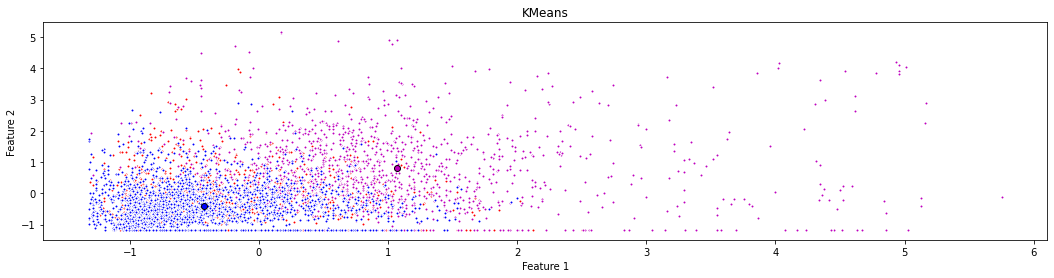

In [76]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

centroids = kmeans.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(X_norm, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"] #Definindo a paleta de cores

fig = plt.figure(figsize=(18, 4)) #Definindo a figura e seu tamanho
ax = fig.add_subplot()             #Criando um subplot

for k, col in zip(range(n_clusters), colors): #Desempacotando a lista de número de cluster e cores.
    my_members = labels == k  #Define quais pontos são membros de cada cluster
    #print(my_members)        #Descomente essa linha para entender como se comporta a variável my_members
    cluster_center = centroids[k] #Pega as coordenadas do centróide k
    ax.plot(                      #Plota os pontos do centróide k
        X_norm[my_members, 0],    #Coordenada do eixo-x
        X_norm[my_members, 1],    #Coordenada do eixo-y
        markerfacecolor=col,      #Define a cor do ponto
        marker=".",               #Define o estilo do ponto
        markeredgecolor="w",      #Define a cor de contorno do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )
    ax.plot(                      #Plotando os centróides
        cluster_center[0],        #Coordenada x do centróide
        cluster_center[1],        #Coordenada y do centróide
        marker="o",               #Define estilo do ponto
        markerfacecolor=col,      #Define cor do ponto
        markeredgecolor="k",      #Define a cor do contorno do ponto
        markersize=6,             #Define o tamanho do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )

ax.set_title("KMeans")  #Título do gráfico
plt.xlabel('Feature 1') #Nome da componente x
plt.ylabel('Feature 2') #Nome da componente y

plt.show() #Mostrar o gráfico

Por meio do dataset normal tentamos clusterizar grupos utilizando duas features, onde foi possivel ver poucas diferenças entre os grupos, devido a correção não tão forte  entre as componetes, algo não padronizado. 

### Com os dados do PCA

In [77]:
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

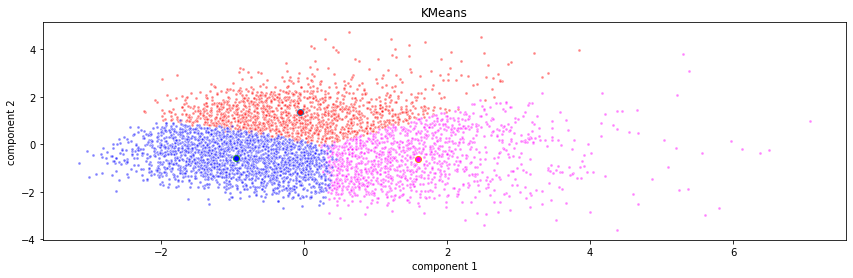

In [78]:
n_clusters=3

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

y_kmeans = kmeans.fit_predict(X_pca)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["red", "magenta", "blue", "yellow", "black","green","pink","purple"]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0],
        X_pca[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("KMeans")
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

Ocorreu uma otima divisão, todavia, os dados não são bem retratados comparando ao plot feito na seção anterior com PCA, portanto, o método clustering não foi efetivo nesse caso. Chegamos a essa conclusão, devido a grande dispersão dos resultados e a não tão grande relação entre resultado da partida e as duas componemtes principais.

### Cotovelo de clusters

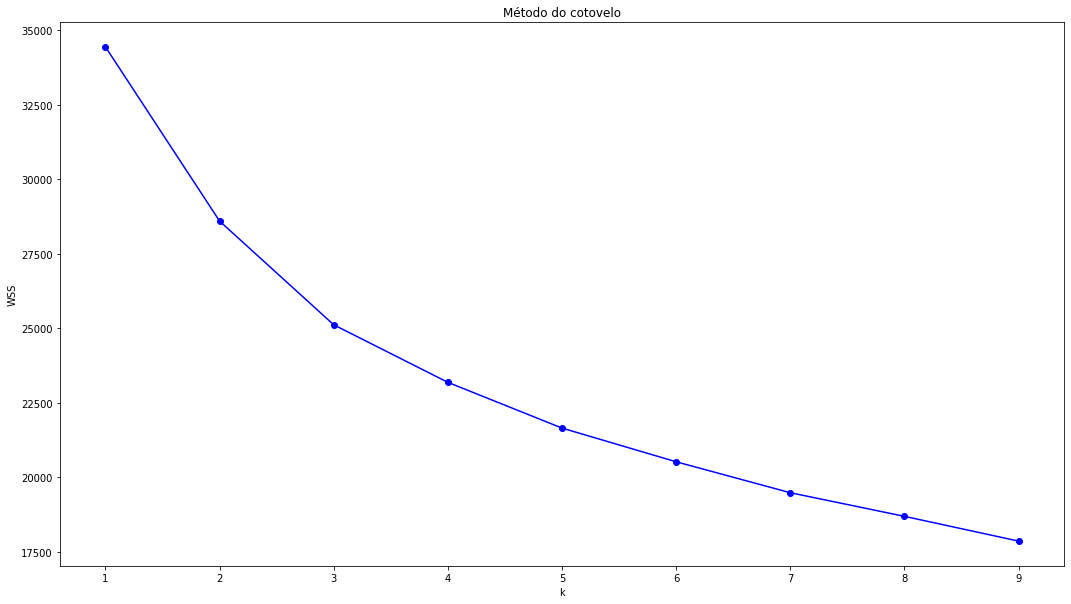

In [79]:
WSS = []  #Inicia uma lista vazia, para acumularmos valores.

for k in range(1,10): #Vamos fazer para 1 a 9 clusters.
    kmeans = KMeans(  #Inicializa o K-Means, como já explicado antes
        n_clusters=k, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )
    y_kmeans = kmeans.fit_predict(X_pca) #Fita o K-Means
    WSS.append(kmeans.inertia_)          #Obtem a WSS e acumula na lista inicializada 
    
plt.figure(figsize=(18,10))              #Define o tamanho da figura
plt.plot(range(1,10), WSS, '-bo')        #Define o plot
plt.xlabel('k')                          #Nome da coordenada x
plt.ylabel('WSS')                        #Nome da coordenada y
plt.title('Método do cotovelo')          #Título do gráfico
plt.show()             

Observando o gráfico obtido, notamos que não houve nenhuma grande variação no formato de cotovelo, o que determinasse em uma quantidade ideal de clusterings para ser usados. Portanto usamos k = 3 por causa dos 3 tipos de resultados possiveis.

## Detecção de Valores Anômalos

### Local Outlier Factor (LOF)

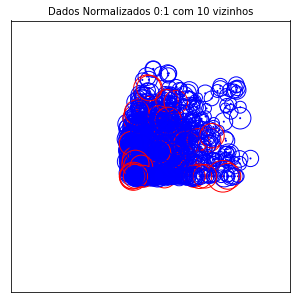

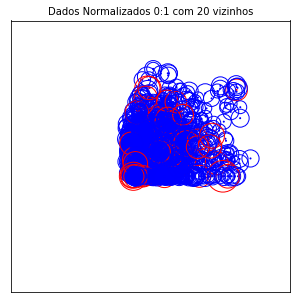

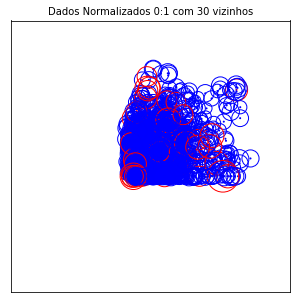

In [82]:
from sklearn.neighbors import LocalOutlierFactor

N_VIZINHOS = [10,20,30]
FRACAO_OUTLIERS = 0.01

# Gráficos com os dados do dataset normalizados

data_x = X_norm
CORES = np.array(["red", "blue"])

for n_viz in N_VIZINHOS:
    # Aqui que criamos o modelo de Local Outlier Factor
    modelo_lof = LocalOutlierFactor(
    n_neighbors=n_viz,
    contamination=FRACAO_OUTLIERS,
    )
    modelo_lof.fit(data_x)
    
    previsao = modelo_lof.fit_predict(data_x)
    fig, eixo = plt.subplots(figsize=(5, 5))
    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        marker=".",
        s=4,
        color=CORES[(previsao + 1) // 2],
    )
    # plota os círculos!
    X_lof = modelo_lof.negative_outlier_factor_
    raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        s=1000 * raios,
        edgecolors=CORES[(previsao + 1) // 2],
        facecolors="none",
    )
    eixo.set_xlim(-8, 8)
    eixo.set_ylim(-8, 8)
    eixo.set_xticks(())
    eixo.set_yticks(())
    eixo.set_title(f"Dados Normalizados 0:1 com {n_viz} vizinhos", fontsize=10)
    plt.show()

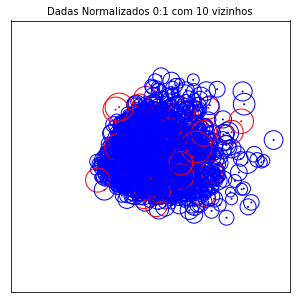

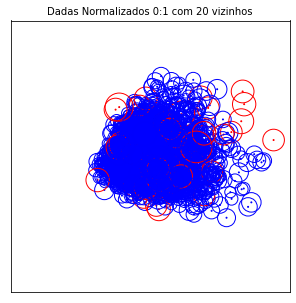

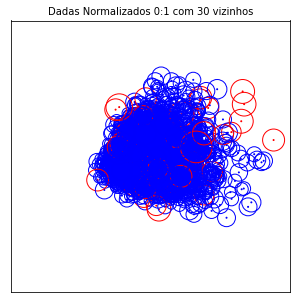

In [84]:
from sklearn.neighbors import LocalOutlierFactor

N_VIZINHOS = [10,20,30]
FRACAO_OUTLIERS = 0.01

# Gráficos com os dados do pca:

data_x = X_pca
CORES = np.array(["red", "blue"])

for n_viz in N_VIZINHOS:
    # Aqui que criamos o modelo de Local Outlier Factor
    modelo_lof = LocalOutlierFactor(
    n_neighbors=n_viz,
    contamination=FRACAO_OUTLIERS,
    )
    modelo_lof.fit(data_x)
    
    previsao = modelo_lof.fit_predict(data_x)
    fig, eixo = plt.subplots(figsize=(5, 5))
    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        marker=".",
        s=4,
        color=CORES[(previsao + 1) // 2],
    )
    # plota os círculos!
    X_lof = modelo_lof.negative_outlier_factor_
    raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        s=1000 * raios,
        edgecolors=CORES[(previsao + 1) // 2],
        facecolors="none",
    )
    eixo.set_xlim(-8, 8)
    eixo.set_ylim(-8, 8)
    eixo.set_xticks(())
    eixo.set_yticks(())
    eixo.set_title(f"Dadas Normalizados 0:1 com {n_viz} vizinhos", fontsize=10)
    plt.show()

Por meio do gráfico é possivel ter ideia de apenas alguns outlies possiveis na borda dessa comparação de features. Nessa perpectiva, com uma maior quantidade de vizinhos é visivel uma melhora na visualização dos outliers.

### Isolation Forest

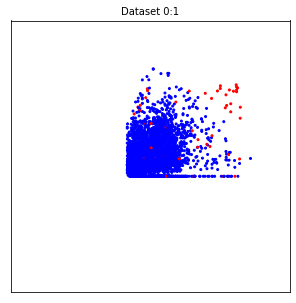

In [89]:
# Gráficos com os dados normalizados

from sklearn.ensemble import IsolationForest

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = False # mude para True para ver a borda de previsão
FRACAO_OUTLIERS = 0.01
# Aqui que criamos o modelo de Isolation Forest
modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
data_x = X_norm
modelo_if.fit(data_x)
previsao = modelo_if.predict(data_x)
fig, eixo = plt.subplots(figsize=(5, 5))
eixo.scatter(
    data_x[:, 0],
    data_x[:, 1],
    s=4,
    color=CORES[(previsao + 1) // 2],
)
eixo.set_xlim(-8, 8)
eixo.set_ylim(-8, 8)
eixo.set_xticks(())
eixo.set_yticks(())
eixo.set_title(f"Dataset 0:1", fontsize=10)
# plota a borda entre as regiões de outlier/inlier
if COM_BORDA_DE_PREVISAO:
    xx, yy = np.meshgrid(
        np.linspace(-8, 8, 150),
        np.linspace(-8, 8, 150),
    )
    Z = modelo_if.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    eixo.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
plt.show()

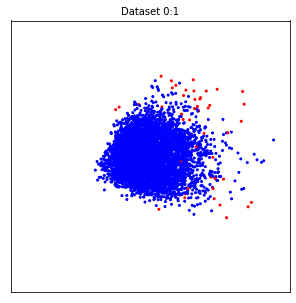

In [90]:
# Gráficos com os dados do pca

from sklearn.ensemble import IsolationForest

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = False # Mude para True para ver a borda de previsão
FRACAO_OUTLIERS = 0.01
# Aqui que criamos o modelo de Isolation Forest
modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
data_x = X_pca
modelo_if.fit(data_x)
previsao = modelo_if.predict(data_x)
fig, eixo = plt.subplots(figsize=(5, 5))
eixo.scatter(
    data_x[:, 0],
    data_x[:, 1],
    s=4,
    color=CORES[(previsao + 1) // 2],
)
eixo.set_xlim(-8, 8)
eixo.set_ylim(-8, 8)
eixo.set_xticks(())
eixo.set_yticks(())
eixo.set_title(f"Dataset 0:1", fontsize=10)
# Plota a borda entre as regiões de outlier/inlier
if COM_BORDA_DE_PREVISAO:
    xx, yy = np.meshgrid(
        np.linspace(-8, 8, 150),
        np.linspace(-8, 8, 150),
    )
    Z = modelo_if.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    eixo.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
plt.show()

A visualização gráfica dos dados é difícil devido a quantidade de features que gera uma grande quantidade de dimensões. EX: uma nuvem bem localizada com outlier diretamente acima no eixo z, quando é analisado levando em conta o plano x e y, aparenta que o ponto vermelho está acima do azul, mas avaliando por outros eixos, esse outlier está entre os pontos e não acima como anteriormente apresentado. Além disso a Isolation Forest apresentou-se um pouco mais eficaz para diferenciar os outliers, mesmo com essa difícil visualização. 